In [95]:
'''Trains a simple convolutional net on the MNIST dataset.'''

'Trains a simple convolutional net on the MNIST dataset.'

In [96]:
from keras.datasets import mnist
from keras.utils import np_utils
import numpy as np
np.random.seed(10)

# Read MNIST data
(X_Train, y_Train), (X_Test, y_Test) = mnist.load_data()

print(X_Train.shape)

(60000, 28, 28)


In [97]:
# Translation of data
X_Train40 = X_Train.reshape(X_Train.shape[0], 28, 28, 1).astype('float32')
X_Test40 = X_Test.reshape(X_Test.shape[0], 28, 28, 1).astype('float32')


In [98]:
# Standardize feature data
X_Train40_norm = X_Train40 / 255
X_Test40_norm = X_Test40 /255

# Label Onehot-encoding
y_TrainOneHot = np_utils.to_categorical(y_Train)
y_TestOneHot = np_utils.to_categorical(y_Test)

In [99]:
from keras.models import Sequential
from keras.layers import Dense,Dropout,Flatten,Conv2D,MaxPooling2D

model = Sequential()
# Create CN layer 1
model.add(Conv2D(filters=16,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))
# Create Max-Pool 1
model.add(MaxPooling2D(pool_size=(2,2)))

# Create CN layer 2
model.add(Conv2D(filters=36,
                 kernel_size=(5,5),
                 padding='same',
                 input_shape=(28,28,1),
                 activation='relu'))

# Create Max-Pool 2
model.add(MaxPooling2D(pool_size=(2,2)))

# Add Dropout layer
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [100]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_17 (Conv2D)           (None, 28, 28, 16)        416       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 14, 14, 36)        14436     
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 7, 7, 36)          0         
_________________________________________________________________
dropout_17 (Dropout)         (None, 7, 7, 36)          0         
_________________________________________________________________
flatten_9 (Flatten)          (None, 1764)              0         
_________________________________________________________________
dense_16 (Dense)             (None, 128)              

In [101]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

train_history = model.fit(x=X_Train40_norm,
                          y=y_TrainOneHot, validation_split=0.2,
                          epochs=10, batch_size=300, verbose=1)


Train on 48000 samples, validate on 12000 samples
Epoch 1/10
48000/48000 [==============================] - 1s 31us/step - loss: 0.4673 - accuracy: 0.8542 - val_loss: 0.1011 - val_accuracy: 0.9693

In [102]:
print("\t[Info] Making prediction of X_Test40_norm")
prediction = model.predict_classes(X_Test40_norm)  # Making prediction and save result to prediction
print()
print("\t[Info] Show 10 prediction result (From 240):")
print("%s\n" % (prediction[240:250]))


	[Info] Making prediction of X_Test40_norm

	[Info] Show 10 prediction result (From 240):
[5 9 8 7 2 3 0 4 4 2]



In [103]:
import matplotlib.pyplot as plt
def plot_image(image):
    fig = plt.gcf()
    fig.set_size_inches(2,2)
    plt.imshow(image, cmap='binary')
    plt.show()
def plot_images_labels_predict(images, labels, prediction, idx, num=10):
    fig = plt.gcf()
    fig.set_size_inches(12, 14)
    if num > 25: num = 25
    for i in range(0, num):
        ax=plt.subplot(5,5, 1+i)
        ax.imshow(images[idx], cmap='binary')
        if len(prediction) > 0:
            title = "true={},predict={}".format(str(labels[idx]), str(prediction[idx]))
        else:
            title = "true={}".format(str(labels[idx]))
        ax.set_title(title, fontsize=10)
        ax.set_xticks([]); ax.set_yticks([])
        idx+=1
    plt.show()

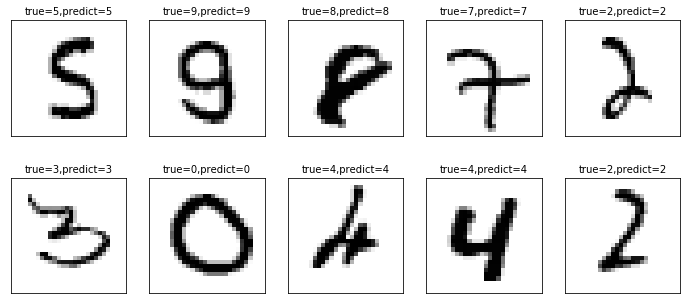

In [104]:

plot_images_labels_predict(X_Test, y_Test, prediction, idx=240)